# Test parsing CSVs to nice plots

This script loads the CSV result files of the STREAM benchmark and creates a polar plot out of it

In [1]:
# Import required modules
import pandas as pd
import matplotlib.pyplot as plt
import math

In [13]:
# read in the CSV file
df = pd.read_csv("../source/STREAM/results/STREAM-2-3.csv", index_col=0)
df

,BittWare 520N,Alveo U280,Alveo U280.1,PAC D5005
FPGA board,,,,
FPGA,Intel Stratix 10 GX2800,Xilinx XCU280,Xilinx XCU280,Intel Stratix 10 SX
Memory Type,DDR,DDR,HBM2,SVM
SDK,19.4.0,2019.2,2019.2,19.4.0
BSP/Shell,19.2.0_hpc,2019.2.3,2019.2.3,18.1.2_svm
CPU,Intel Xeon Gold 6148,Intel Xeon Gold 6148,Intel Xeon Gold 6148,Intel Xeon Gold 6148
System,`Noctua <https://pc2.uni-paderborn.de/hpc-serv...,NaN,NaN,NaN
DATA_TYPE,float,float,float,float
VECTOR_COUNT,16,16,16,16
GLOBAL_MEM_UNROLL,1,1,1,1


In [69]:
# Define the relevant metrics of the benchmark that should be plotted
metrics = ["Copy", "Add", "Scale", "Triad"]
total_metrics = ["%s total" % s for s in metrics]
pci_metrics = ["PCIe Read", "PCIe Write"]

# Select the required metrics and the used memory type for further processing
df_relevant = df.T[metrics + ["Memory Type"] + pci_metrics]

# Set the PCIe values to 0 for every result that used SVM to prevent weirdly shaped plots
df_relevant.loc[df_relevant["Memory Type"] == "SVM", ["PCIe Read", "PCIe Write"]] = "0.0"
for m in total_metrics:
    df_relevant[m] = 0.0

# convert all metrics to float and normalize them
for m in pci_metrics:
    df_relevant[m] = df_relevant[m].astype(float)
    df_relevant.loc[df_relevant[m] == 0.0, total_metrics] = df_relevant[df_relevant[m] == 0.0][metrics].astype(float).values
for m in metrics:
    size = {"Copy" : 4294967296, "Add": 6442450944, "Scale": 4294967296, "Triad": 6442450944}
    df_relevant[m] = df_relevant[m].astype(float)
    print( (size[m] * 1.0e-9) / ((size[m] * 1.0e-9 /  df_relevant[df_relevant["Memory Type"] != "SVM"][m]) + (size[m] * 1.0e-9 /  df_relevant[df_relevant["Memory Type"] != "SVM"]["PCIe Read"]) + (size[m] * 1.0e-9 /  df_relevant[df_relevant["Memory Type"] != "SVM"]["PCIe Write"])))
    df_relevant.loc[df_relevant["Memory Type"] != "SVM",["%s total" % m]] =  (size[m] * 1.0e-9) / ((size[m] * 1.0e-9 /  df_relevant[df_relevant["Memory Type"] != "SVM"][m]) + (size[m] * 1.0e-9 /  df_relevant[df_relevant["Memory Type"] != "SVM"]["PCIe Read"]) + (size[m] * 1.0e-9 /  df_relevant[df_relevant["Memory Type"] != "SVM"]["PCIe Write"]))
    df_relevant["%s total" % m] = df_relevant["%s total" % m] / df_relevant["%s total" % m].max()
    df_relevant[m] = df_relevant[m] / df_relevant[m].max()
for m in pci_metrics:
    df_relevant[m] = df_relevant[m] / df_relevant[m].max()

df_relevant

BittWare 520N    3.038062
Alveo U280       2.575093
Alveo U280.1     3.138366
dtype: float64
BittWare 520N    3.041845
Alveo U280       2.578714
Alveo U280.1     3.138129
dtype: float64
BittWare 520N    3.038533
Alveo U280       2.574978
Alveo U280.1     3.137537
dtype: float64
BittWare 520N    3.041845
Alveo U280       2.578659
Alveo U280.1     3.138466
dtype: float64


FPGA board,Copy,Add,Scale,Triad,Memory Type,PCIe Read,PCIe Write,Copy total,Add total,Scale total,Triad total
BittWare 520N,0.177548,0.184210,0.183816,0.181852,DDR,0.962462,1.000000,0.150772,0.202250,0.151623,0.201180
Alveo U280,0.089926,0.092452,0.092728,0.091243,DDR,0.852853,0.865506,0.127796,0.171457,0.128492,0.170546
Alveo U280.1,1.000000,1.000000,1.000000,1.000000,HBM2,1.000000,0.954114,0.155750,0.208652,0.156564,0.207571
PAC D5005,0.053389,0.040211,0.054784,0.039907,SVM,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000


[0.17754755974776112, 0.18420982274149136, 0.18381629305631492, 0.18185177364864866, 0.9624624624624625, 1.0, 0.15077229486215102, 0.2022503154094966, 0.1516234011273506, 0.20118020792055746]
[0.08992634200625298, 0.0924524770740315, 0.09272826681246583, 0.0912426097972973, 0.8528528528528528, 0.865506329113924, 0.12779619022702868, 0.17145706936340185, 0.12849191813149677, 0.17054621017719523]
[1.0, 1.0, 1.0, 1.0, 1.0, 0.9541139240506329, 0.155750150786809, 0.20865219628165593, 0.15656371139128833, 0.20757050948684994]
[0.05338879762598696, 0.04021067828783787, 0.05478403499179879, 0.03990709459459459, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]


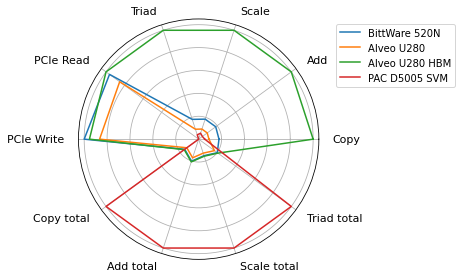

In [87]:

# Define some colors and line styles that should be used for plotting the data
#colors = ["aqua", "royalblue"]
#linestyles = ["solid", "dashed", "dashdot", "dotted"]
labels = ["BittWare 520N"	,"Alveo U280",	"Alveo U280 HBM", "PAC D5005 SVM"]
 
# Calculate the used angle in the polar plot for the different metrics
angles = [n / float(len(2*metrics + pci_metrics)) * 2 * math.pi for n in range(len(2*metrics + pci_metrics))]
angles += angles[:1]
 
# Initialise the polar plot
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1, projection="polar")

# Draw one axe per variable and add the labels on x and y axis
plt.xticks(angles[:-1], metrics + pci_metrics + total_metrics, color='black', size=11, horizontalalignment="left")
t = ax.xaxis.get_major_ticks()
for td in t[3:8]:
    td.label1.set_horizontalalignment("right")
plt.yticks([(i + 1) / float(5) for i in range(5)], ["" for i in range(5)])
 
# Iterate over measurements and add them to the plot
for i, dev in enumerate(df_relevant.index):
    row = df_relevant[metrics + pci_metrics + total_metrics].T[dev].values.tolist()
    print(row)
    row += row[:1]
    # Plot data and puck the color and line style accordingly using a round-robin scheme
    #ax.plot(angles, row, linewidth=1.5, color=colors[i % len(colors)], linestyle=linestyles[int(i / len(colors)) % len(linestyles)], label="%s" % (dev))
    ax.plot(angles, row, linewidth=1.5, label="%s" % (labels[i]))

# Print the legend outside of the radar plot
ax.legend(loc="top right", bbox_to_anchor=(1.05,1.0))
fig.tight_layout()

# Store the plot as JPEG on the disk
fig.savefig("../source/STREAM/results/stream_results.pdf")